# Вопросы по регрессии

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Расстояние-Махаланобиса" data-toc-modified-id="Расстояние-Махаланобиса-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Расстояние Махаланобиса</a></span></li><li><span><a href="#Регрессия-L1" data-toc-modified-id="Регрессия-L1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия L1</a></span><ul class="toc-item"><li><span><a href="#Норма-Ln" data-toc-modified-id="Норма-Ln-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Норма Ln</a></span></li></ul></li></ul></div>

In [1]:
# Imports
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Расстояние Махаланобиса

1. **Вопрос**: Рассмотрим набор точек, подчиняющийся многомерному нормальному распределению и образующий класс. Как вычислить расстояние от некоторых выбранных точек до &laquo;центра масс&raquo; класса?\
   **Ответ**: Сначала нужно преобразовать данные (привести эллиптическое облако к круглой форме), а затем посчитать обычное евклидово расстояние. В итоге получиться расстояние Махаланобиса (показать это).

---

## Регрессия L1

In [4]:
from scipy.optimize import minimize

In [5]:
# L1 optimization to reject outlier
def L1_norm(a, *args):
    x, b = args
    return np.linalg.norm(a*x-b, ord=1)

In [6]:
x = np.sort(4*(np.random.rand(25,1)-0.5),axis=0) # Random data from [-2,2]
b = 0.5*x + 0.1*np.random.randn(len(x),1)  # Line y = 0.5x with noise

b_out = b.copy()
b_out[-1] = -5 # Introduce outlier

In [7]:
aL1, aL2 = [0, 0], [0, 0]

res = np.linalg.lstsq(x,b,rcond=None)[0] # Least-squares slope (no outliers)
aL2[0] = res.item(0)

res = np.linalg.lstsq(x,b_out,rcond=None)[0] # New slope
aL2[1] = res.item(0)

In [8]:
print(aL2)

[0.4803782548871225, 0.12364447002212366]


In [9]:
a0 = aL2[0]   # initialize to L2 solution
res = minimize(L1_norm, a0, args=(x, b))
# print(res)
aL1[0] = res.x[0]  # aL1 is robust

res = minimize(L1_norm, a0, args=(x, b_out))
# print(res)
aL1[1] = res.x[0]  # aL1 is robust

In [10]:
print(aL2)
print(aL1)

[0.4803782548871225, 0.12364447002212366]
[0.4857242233125988, 0.48502963123948856]


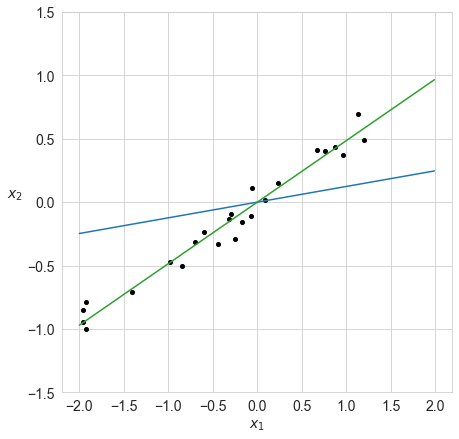

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# Plotting X
ax.plot(x[:-1],b[:-1],'ko')               # Data
ax.plot(x[-1],b_out[-1],'o',c=cm(3),ms=7) # Outlier

xgrid = np.arange(-2,2,0.01)
# ax.plot(xgrid,aL2[0]*xgrid,'k-')        # L2 fit (no outlier)
ax.plot(xgrid,aL2[1]*xgrid,'-',c=cm(0)) # L2 fit (outlier)
ax.plot(xgrid,aL1[1]*xgrid,'-',c=cm(2)) # L1 fit (outlier)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0, ha='right')
ax.set_ylim([-1.5, 1.5])
plt.show()

### Норма Ln

In [12]:
# Ln optimization to reject outlier
def Ln_norm(a, *args):
    x, b, n = args
    res = (a*x-b).flatten()
    return np.linalg.norm(res, ord=n)

In [13]:
n = 3
aLn = [0, 0]
a0 = aL2[0]   # initialize to L2 solution

res = minimize(Ln_norm, a0, args=(x, b_out, n))
# print(res)
aLn[1] = res.x[0]

In [14]:
print(aL2)
print(aL1)
print(aLn)

[0.4803782548871225, 0.12364447002212366]
[0.4857242233125988, 0.48502963123948856]
[0, -0.42003852745142684]


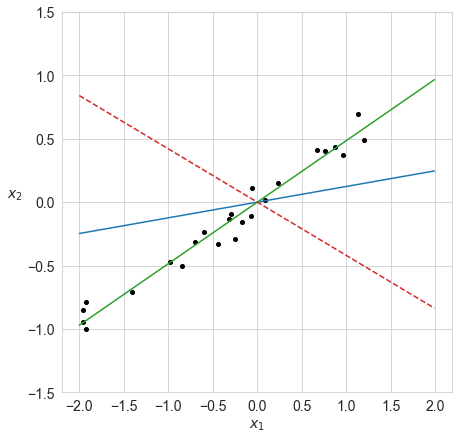

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

# Plotting X
ax.plot(x[:-1],b[:-1],'ko')               # Data
ax.plot(x[-1],b_out[-1],'o',c=cm(3),ms=7) # Outlier

xgrid = np.arange(-2,2,0.01)
# ax.plot(xgrid,aL2[0]*xgrid,'k-')         # L2 fit (no outlier)
ax.plot(xgrid,aL2[1]*xgrid, '-',c=cm(0)) # L2 fit (outlier)
ax.plot(xgrid,aL1[1]*xgrid, '-',c=cm(2)) # L1 fit (outlier)
ax.plot(xgrid,aLn[1]*xgrid,'--',c=cm(3)) # Ln fit (outlier)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0, ha='right')
ax.set_ylim([-1.5, 1.5])
plt.show()